<a href="https://colab.research.google.com/github/Aldistwn29/machineLearning/blob/main/LN11_EnsembleLearning_HeartDeseases(Aldi_Setiawan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
#Load Data
df = pd.read_csv('nilai.csv')
df.head()

,quis,tugas,uts,uas,status,avg
0,20,70,30,80,0,50.0
1,21,71,31,81,0,51.0
2,22,72,32,82,0,52.0
3,23,73,33,83,0,53.0
4,24,74,34,84,0,54.0


In [24]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   quis    39 non-null     int64  
 1   tugas   39 non-null     int64  
 2   uts     39 non-null     int64  
 3   uas     39 non-null     int64  
 4   status  39 non-null     int64  
 5   avg     39 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 2.0 KB


In [25]:
# Menghitung persentase duplikasi
percentage_duplicates = (df.duplicated().sum() / df.shape[0]) * 100

print("Jumlah duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data
print(f"Persentase duplikasi: {percentage_duplicates:.2f}%")

Jumlah duplikasi :  0
Persentase duplikasi: 0.00%


In [26]:
df.describe() #Memeriksa Parameter Statistik

,quis,tugas,uts,uas,status,avg
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,39.000000,78.051282,47.948718,84.230769,0.615385,62.307692
std,11.401754,13.873391,13.186813,7.902237,0.492864,6.445996
min,20.000000,30.000000,20.000000,70.000000,0.000000,50.000000
25%,29.500000,73.500000,36.500000,79.500000,0.000000,57.875000
50%,39.000000,80.000000,49.000000,84.000000,1.000000,63.250000
75%,48.500000,85.500000,59.500000,89.500000,1.000000,66.375000
max,58.000000,98.000000,70.000000,100.000000,1.000000,75.000000


In [27]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [34]:
df_new = df.drop('avg', axis=1)
df_new.head()

,quis,tugas,uts,uas,status
0,20,70,30,80,0
1,21,71,31,81,0
2,22,72,32,82,0
3,23,73,33,83,0
4,24,74,34,84,0


In [35]:
print("Jumlah Duplikasi : ", df_new.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


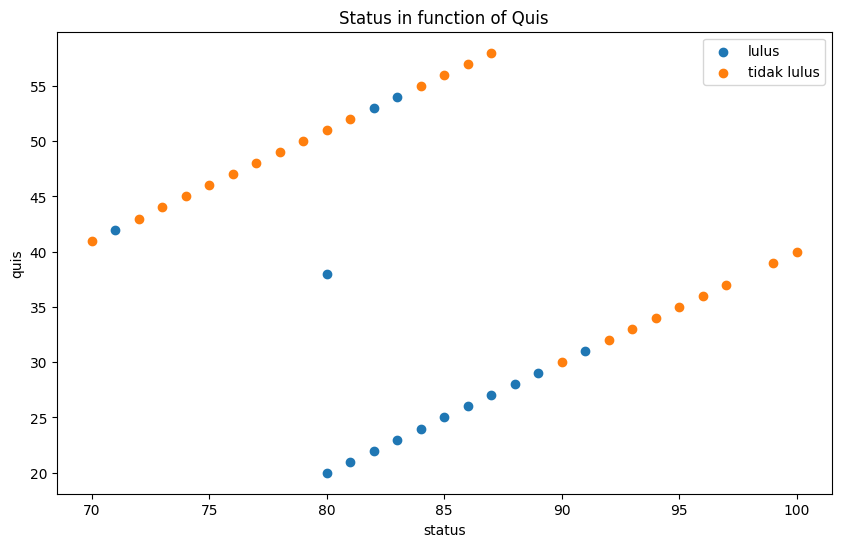

In [39]:
plt.figure(figsize=(10,6))

# status = 0
plt.scatter(x = df_new[df_new['status']==0]['uas'], y = df_new.quis[df_new.status==0])
#status = 1
plt.scatter(x = df_new[df_new['status']==1]['uas'], y = df_new.quis[df_new.status==1],);

plt.title("Status in function of Quis")
plt.xlabel("status")
plt.ylabel("quis")
plt.legend(["lulus", "tidak lulus"])

Text(0, 0.5, 'uas')

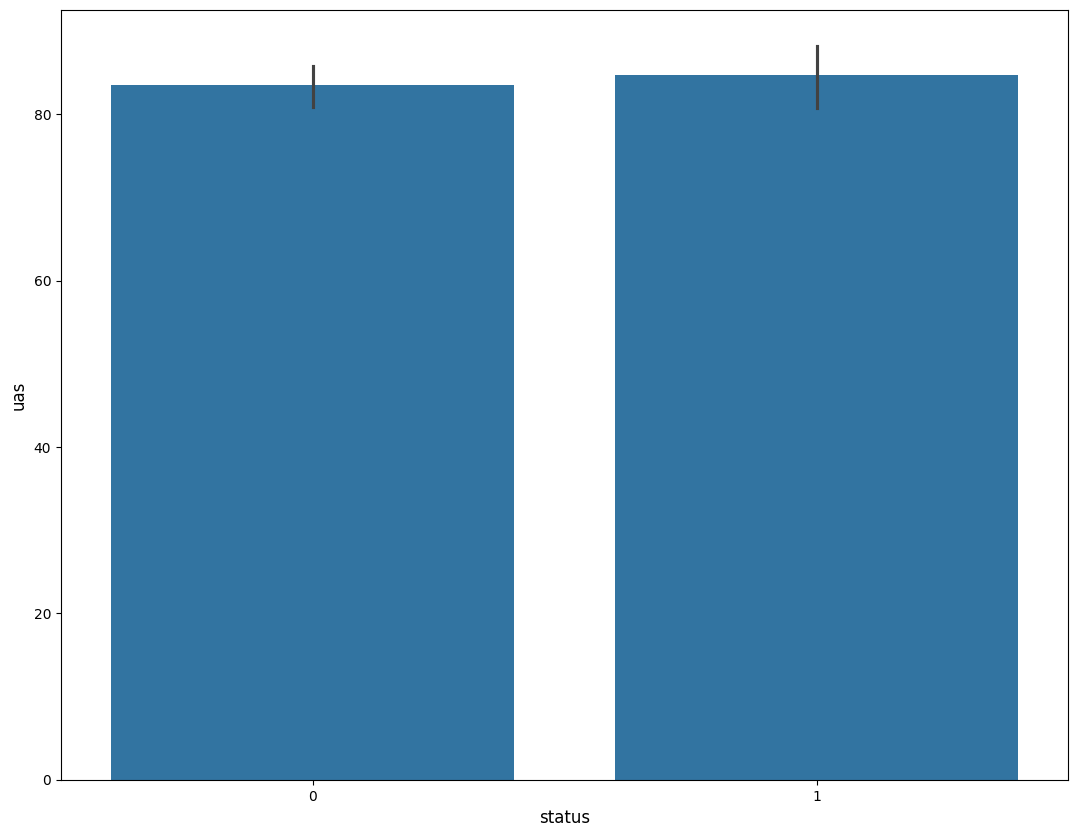

In [57]:
plt.figure(figsize=(13,10))
sns.barplot(x=df_new["status"],y=df_new["uas"])
plt.xlabel('status',fontsize=12)
plt.ylabel('uas',fontsize=12)

In [58]:
# #Feature Engineering
# #Mengganti Kolom Sex
# df["sex"].replace({"Male" : 1,
#                    "Female" : 0}, inplace=True)
# #Mengganti Kolom Chest Pain
# df["chest_pain_type"].replace({"Typical angina" : 1,
#                                   "Atypical angina" : 2,
#                                   "Non-anginal pain" : 3,
#                                   "Asymptomatic" : 4}, inplace=True)
# #Mengganti Kolom Fasting Blood Sugar
# df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
#                                    "Lower than 120 mg/ml" : 0}, inplace=True)
# #Mengganti Kolom Resting Electrocardiographic
# df["rest_ecg"].replace({"Normal" : 0,
#                        "ST-T wave abnormality" : 1,
#                        "Left ventricular hypertrophy" : 2}, inplace=True)
# #Mengganti Kolom Exercise Induced Angina
# df["exercise_induced_angina"].replace({"Yes" : 1,
#                                        "No" : 0}, inplace=True)
# #Mengganti Kolom Slope
# df["slope"].replace({"Upsloping" : 1,
#                      "Flat" : 2,
#                      "Downsloping" : 3}, inplace=True)
# #Mengganti Vessels Colored By Flourosopy
# df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
#                                              "One" : 1,
#                                              "Two" : 2,
#                                              "Three" : 3,
#                                              "Four" : 4}, inplace=True)
# #Mengganti Kolom
# df["thalassemia"].replace({"Normal" : 3,
#                         "Fixed Defect" : 6,
#                         "Reversable Defect" : 7,
#                           "No" : 0}, inplace=True)
# df.head()

In [41]:
#Persiapan data menjadi model
sc=StandardScaler()
X=df_new.drop('status',axis=1)
y=df_new['status']
df=sc.fit(X).transform(X)

In [42]:
#Pisahkan data train dan test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)


In [43]:
#Menyusun model, evaluasi dan klasifikasi
def model(X_train,y_train):
    models=[]
   #Random Forest Classifier
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    models.append(rfc)
    #XGBoost
    xgb=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)
    xgb.fit(X_train,y_train)
    models.append(xgb)

In [44]:
models=model(X_train,y_train) #Penampung Nilai X Train dan y Train

In [45]:
Model=['RandomForestClassifier','XgBoost']

In [46]:
# Inisialisasi model-modelnya
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Fit model ke data latih
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Simpan model dalam sebuah list
models = [rf, gb]

# Menghitung Akurasi
train_accuracy=[]
test_accuracy=[]
for i in range(len(models)):
    yhat = models[i].predict(X_test)
    yhat_t = models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t, y_train))
    test_accuracy.append(accuracy_score(yhat, y_test))

In [48]:
Accuracy_score=pd.DataFrame({
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [49]:
Accuracy_score #Melihat Skor Akurasi

,Model,Train_Accuracy,Test_Accuracy
0,RandomForestClassifier,1.0,0.9
1,XgBoost,1.0,0.9


In [50]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) #Membuat Dictionary Dari Hasil Akurasi
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])} #Mengurutkan Dictionary Berdasarkan Nilai Akurasi

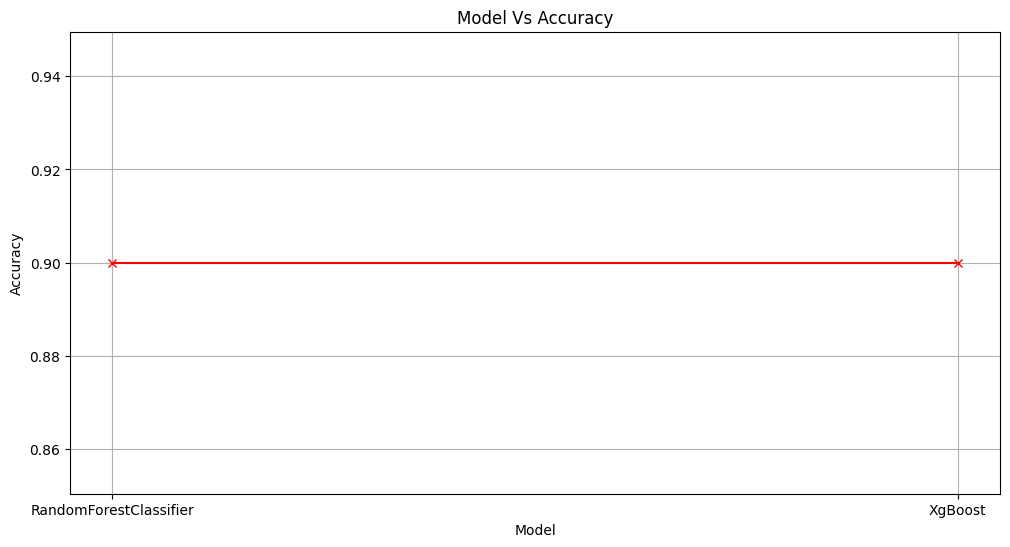

In [51]:
#Membuat Grafik Perbandingan Model dan Akurasi
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()

In [52]:
#Model Terbaik
best_model = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]
print("Model terbaik berdasarkan akurasi pada data uji:")
print(best_model)

Model terbaik berdasarkan akurasi pada data uji:
Model             RandomForestClassifier
Train_Accuracy                       1.0
Test_Accuracy                        0.9
Name: 0, dtype: object


In [53]:
# Ambil model dengan akurasi tertinggi dari Accuracy_score
best_model_name = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]['Model']
best_model_index = Model.index(best_model_name)
best_model = models[best_model_index]

# Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

#Model Evaluation
print(accuracy_score(y_test,y_pred))

0.9


In [54]:
# Prediksi pada data baru (contoh: data test)
# Misalnya, kita akan menggunakan satu baris dari data uji sebagai contoh
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = gb.predict(sample_data)
print("Prediction:", prediction)

Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [55]:
# Evaluasi model dengan mencetak laporan klasifikasi
print("Laporan Klasifikasi untuk Model Terbaik:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi untuk Model Terbaik:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



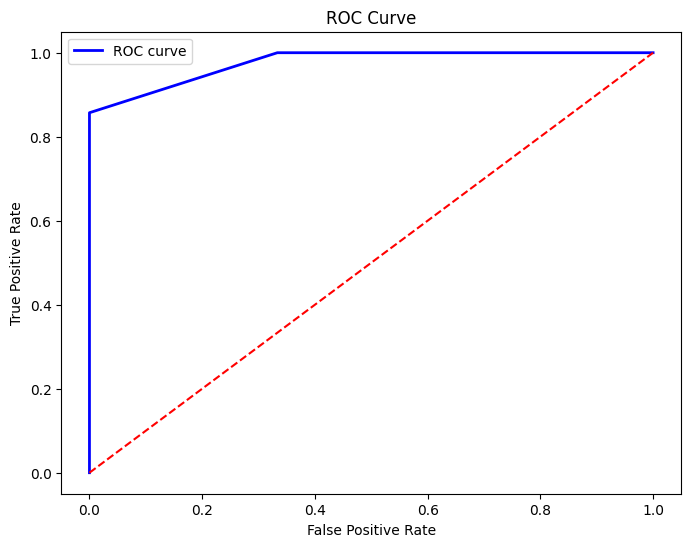

Area under the ROC curve (AUC): 0.98


In [56]:
# Mendapatkan nilai keputusan dari model terbaik
y_scores = best_model.predict_proba(X_test)[:, 1]

# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hitung Area di Bawah Kurva ROC (AUC)
auc = roc_auc_score(y_test, y_scores)
print(f"Area under the ROC curve (AUC): {auc:.2f}")

Kesimpulan:
Random Forest adalah model dengan akurasi terbaik yaitu 90%
area dibawah kurva ROC yaitu 98%